In [1]:
# important imports and flags/options
import torch
from torchvision import datasets
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import cv2

#use cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# check cuda available
print(torch.cuda.is_available())

# options
debug = False
save_results = True
save_model = True
load_model = False

False


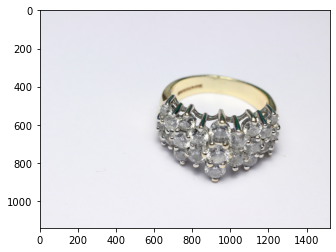

In [2]:
# download sample pictures from github repo

# download sample pictures from github repo
# for i in range(0, 6):
#     !wget https://raw.githubusercontent.com/cmcguinness/focusstack/master/Input/step{i}.jpg

def load_images():
    images = []
    for i in range(0, 6):
        img = cv2.imread(f'input/step{i}.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

# display sample pictures
img_dis = 1
img = cv2.imread(f'input/step{img_dis}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
tensor_transform = transforms.ToTensor()

class AE(torch.nn.Module):
    def __init__(self, H, W):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(H * W * 3, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, H * W * 3),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the MNIST dataset and normalize the pixel values
# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the autoencoder and the optimizer
autoencoder = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Test the autoencoder
autoencoder.eval()
with torch.no_grad():
    for data in test_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        print('Test Loss: {:.4f}'.format(loss.item()))



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.1961
Epoch [2/10], Loss: 0.1870
Epoch [3/10], Loss: 0.1600
Epoch [4/10], Loss: 0.1563
Epoch [5/10], Loss: 0.1369
Epoch [6/10], Loss: 0.1381
Epoch [7/10], Loss: 0.1486
Epoch [8/10], Loss: 0.1426
Epoch [9/10], Loss: 0.1597
Epoch [10/10], Loss: 0.1287
Test Loss: 0.1329
Test Loss: 0.1388
Test Loss: 0.1310
Test Loss: 0.1279
Test Loss: 0.1420
Test Loss: 0.1354
Test Loss: 0.1398
Test Loss: 0.1419
Test Loss: 0.1491
Test Loss: 0.1511
Test Loss: 0.1316
Test Loss: 0.1382
Test Loss: 0.1371
Test Loss: 0.1434
Test Loss: 0.1418
Test Loss: 0.1329
Test Loss: 0.1369
Test Loss: 0.1378
Test Loss: 0.1409
Test Loss: 0.1457
Test Loss: 0.1409
Test Loss: 0.1431
Test Loss: 0.1528
Test Loss: 0.1405
Test Loss: 0.1382
Test Loss: 0.1382
Test Loss: 0.1348
Test Loss: 0.1438
Test Loss: 0.1325
Test Loss: 0.1375
Test Loss: 0.1404
Test Loss: 0.1383
Test Loss: 0.1441
Test Loss: 0.1406
Test Loss: 0.1472
Test Loss: 0.1369
Test L

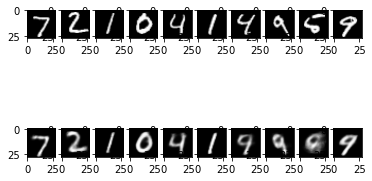

In [9]:
# use aligned_images as dataset

# training loop

# visualize the reconstructed images
images, _ = next(iter(test_loader))
images = images.view(images.size(0), -1)
outputs = autoencoder(images)
images = images.view(images.size(0), 1, 28, 28)
outputs = outputs.view(outputs.size(0), 1, 28, 28)
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray')
    plt.subplot(2, 10, i+11)
    plt.imshow(outputs[i].detach().numpy().reshape(28, 28), cmap='gray')
plt.show()

In [3]:
# helper functions

def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


    homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=2.0)

    return homography

def align_images(images):

    #   SIFT generally produces better results, but it is not FOSS, so chose the feature detector
    #   that suits the needs of your project.  ORB does OK
    use_sift = True

    outimages = []

    if use_sift:
        detector = cv2.xfeatures2d.SIFT_create()
    else:
        detector = cv2.ORB_create(1000)

    #   We assume that image 0 is the "base" image and align everything to it
    print ("Detecting features of base image")
    outimages.append(images[0])
    image1gray = cv2.cvtColor(images[0],cv2.COLOR_BGR2GRAY)
    image_1_kp, image_1_desc = detector.detectAndCompute(image1gray, None)

    for i in range(1,len(images)):
        print ("Aligning image {}".format(i))
        image_i_kp, image_i_desc = detector.detectAndCompute(images[i], None)

        if use_sift:
            bf = cv2.BFMatcher()
            # This returns the top two matches for each feature point (list of list)
            pairMatches = bf.knnMatch(image_i_desc,image_1_desc, k=2)
            rawMatches = []
            for m,n in pairMatches:
                if m.distance < 0.7*n.distance:
                    rawMatches.append(m)
        else:
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            rawMatches = bf.match(image_i_desc, image_1_desc)

        sortMatches = sorted(rawMatches, key=lambda x: x.distance)
        matches = sortMatches[0:128]



        hom = findHomography(image_i_kp, image_1_kp, matches)
        newimage = cv2.warpPerspective(images[i], hom, (images[i].shape[1], images[i].shape[0]), flags=cv2.INTER_LINEAR)

        outimages.append(newimage)
        # If you find that there's a large amount of ghosting, it may be because one or more of the input
        # images gets misaligned.  Outputting the aligned images may help diagnose that.
        # cv2.imwrite("aligned{}.png".format(i), newimage)



    return outimages

def doLap(image):

    # YOU SHOULD TUNE THESE VALUES TO SUIT YOUR NEEDS
    kernel_size = 5         # Size of the laplacian window
    blur_size = 5           # How big of a kernal to use for the gaussian blur
                            # Generally, keeping these two values the same or very close works well
                            # Also, odd numbers, please...

    blurred = cv2.GaussianBlur(image, (blur_size,blur_size), 0)
    return cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size)

def focus_stack(unimages):
    images = align_images(unimages)

    print ("Computing the laplacian of the blurred images")
    laps = []
    for i in range(len(images)):
        print ("Lap {}".format(i))
        laps.append(doLap(cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)))

    laps = np.asarray(laps)
    print ("Shape of array of laplacians = {}".format(laps.shape))

    output = np.zeros(shape=images[0].shape, dtype=images[0].dtype)

    abs_laps = np.absolute(laps)
    maxima = abs_laps.max(axis=0)
    bool_mask = abs_laps == maxima
    mask = bool_mask.astype(np.uint8)
    for i in range(0,len(images)):
        output = cv2.bitwise_not(images[i],output, mask=mask[i])
		
    return 255-output

In [5]:
# Poisson Blending using cv

def poisson_blend(img2, img1, mask):
    plt.imshow(mask)
    plt.show()
    
    # br = cv2.boundingRect(mask) # bounding rect (x,y,width,height)
    # centerOfBR = (br[0] + br[2] // 2, br[1] + br[3] // 2)

    #center of image 1
    centerOfImg1 = (img1.shape[1] // 2, img1.shape[0] // 2)

    Poisson_result = cv2.seamlessClone(img1, img2, mask, centerOfImg1, cv2.NORMAL_CLONE)
    return Poisson_result

In [6]:
# testing helper functions
images = load_images()
aligned_images = align_images(images)

loader = torch.utils.data.DataLoader(dataset = aligned_images,
                                     batch_size = 1)

print ("Computing the laplacian of the blurred images")
laps = []
for i in range(len(aligned_images)):
    print ("Lap {}".format(i))
    laps.append(doLap(cv2.cvtColor(aligned_images[i],cv2.COLOR_BGR2GRAY)))
laps = np.asarray(laps)


# create mask
abs_laps = np.absolute(laps)
maxima = abs_laps.max(axis=0)
bool_mask = abs_laps == maxima
mask = bool_mask.astype(np.uint8)

output = np.zeros(shape=aligned_images[0].shape, dtype=aligned_images[0].dtype)

for i in range(0,len(aligned_images)):
    output = cv2.bitwise_not(aligned_images[i],output, mask=mask[i])
    
result = 255-output



Detecting features of base image
Aligning image 1
Aligning image 2
Aligning image 3
Aligning image 4
Aligning image 5
Computing the laplacian of the blurred images
Lap 0
Lap 1
Lap 2
Lap 3
Lap 4
Lap 5


mask type and shape:  <class 'numpy.ndarray'> (1141, 1521)


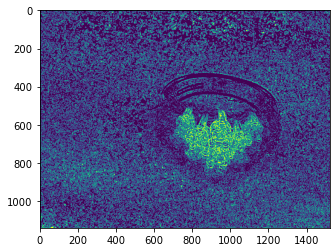

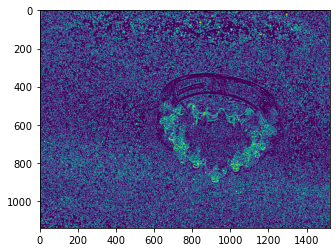

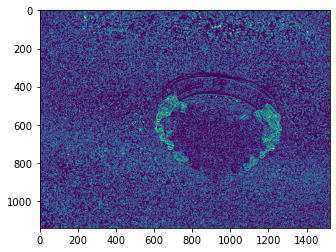

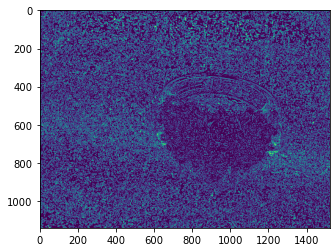

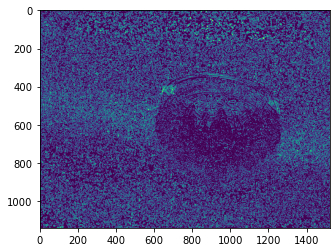

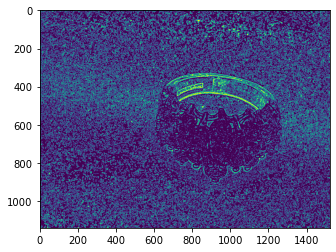

True

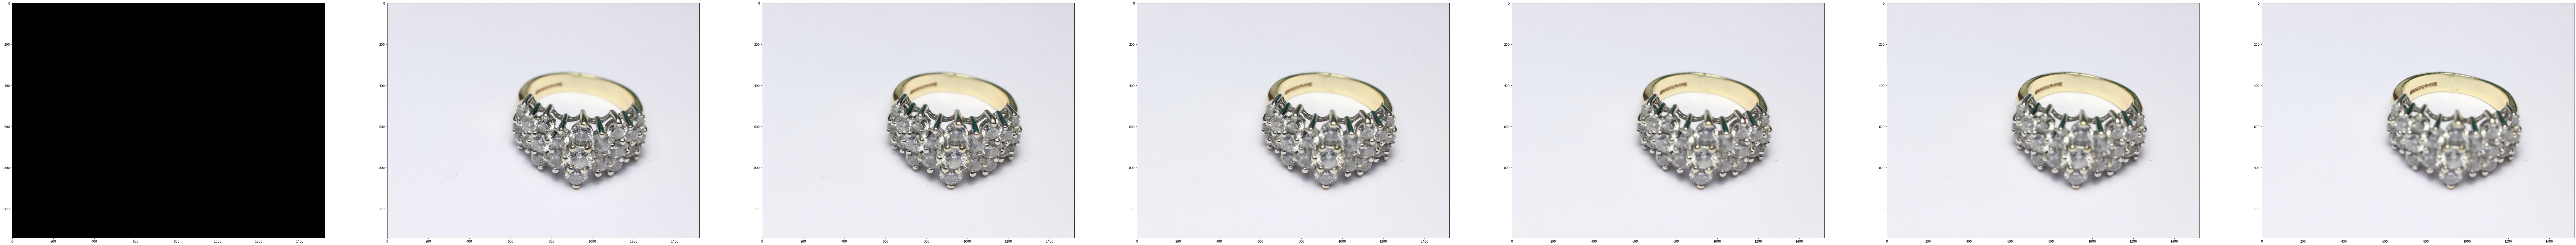

In [7]:
p_output = np.zeros(shape=aligned_images[0].shape, dtype=aligned_images[0].dtype)

step_result = []
step_result.append(p_output)
# Poisson Blending
cleaned_mask = None
print("mask type and shape: ", type(mask[0]), mask[0].shape)
for i in range(0,len(aligned_images)):
    cleaned_mask = mask[i]
    # for j in range(0,len(mask)): 
    #     if i != j:
    #         cleaned_mask = cv2.subtract(cleaned_mask, mask[j])
    p_output = poisson_blend(aligned_images[i], p_output, cleaned_mask)
    step_result.append(p_output)

# show p_result using plt
fig = plt.figure(figsize=(150,150))  # width, height in inches

for i in range(len(step_result)):
    sub = fig.add_subplot(1, len(step_result), i+1)
    sub.imshow(step_result[i])


cv2.imwrite("output/p_result.png", p_output)

In [7]:
# save results in output folder
for i in range(0,len(images)):
    # cv2.imwrite("output/aligned{}.png".format(i), aligned_images[i])
    # cv2.imwrite("output/lap{}.png".format(i), laps[i])
    cv2.imwrite("output/mask{}.png".format(i), mask[i])
# fix the colors of the result image
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite("output/result.png", result)
# cv2.imwrite("output/p_result.png", p_result)

True

In [22]:
# Model Initialization
H, W = aligned_images[0].shape[:2]
# model = AE(H, W)

# clean gpu memory
torch.cuda.empty_cache()

#print memeory usage
# !kill 108582
!nvidia-smi
# model = AE(H, W).to(device)
model = AE(H, W).to(device)
!nvidia-smi
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 5e-1,
                             weight_decay = 1e-8)


epochs = 20
outputs = []
losses = []
mem = []
accumulation_steps = 4
# use profilier to get gpu memory usage
with torch.autograd.profiler.profile(use_cuda=True) as prof:
  for epoch in range(epochs):
      epoch_loss = 0
      for image in loader:
        
        # Reshaping the image to (-1, 784)
        image = image.to(device)
        image = torch.tensor(image, dtype = torch.float32)
        # image = image.reshape(-1, H*W*3)      
        
        
        # Output of Autoencoder
        reconstructed = model(image)
        
        # Calculating the loss function
        loss = loss_function(reconstructed, image)
        
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # get gpu memory
        mem.append(torch.cuda.memory_allocated())
        
        # Storing the losses in a list for plotting
        epoch_loss /= len(loader)
      losses.append(epoch_loss)
      # outputs.append((epochs, image, reconstructed))
      # plot the memory usage after each epoch
      plt.plot(mem)
      plt.title("GPU Memory Usage")
      plt.xlabel("Iteration")
      plt.ylabel("Memory Usage")
      plt.show()

# print the profiler report
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

Mon Mar 27 07:54:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:8A:00.0 Off |                    0 |
| N/A   34C    P0    57W / 300W |   8569MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

TypeError: unsupported operand type(s) for %: 'tuple' and 'int'

In [16]:
# detach all the tensors from gpu
model = model.cpu()

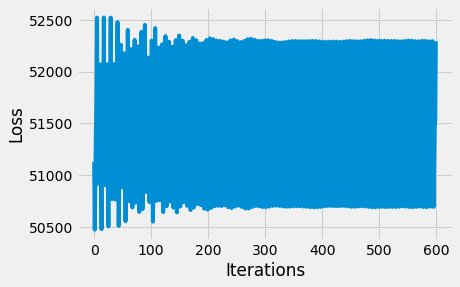

In [10]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
losses = torch.tensor(losses).cpu().detach().numpy()
plt.plot(losses)

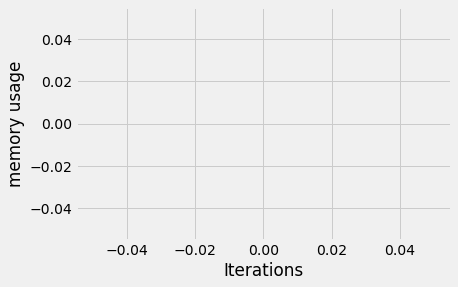

In [10]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('memory usage')

# Plotting the last 100 values
mem = torch.tensor(mem).cpu().detach().numpy()
plt.plot(mem)

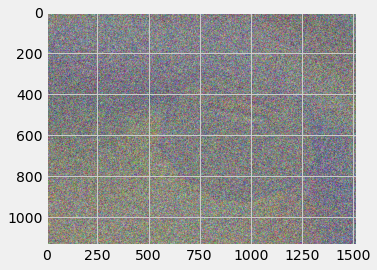

In [12]:
x = aligned_images[0].reshape(-1, H*W*3)

# Converting the image to a tensor
x = torch.tensor(x, dtype = torch.float32)
x = x.to(device)

pred = model(x)
pred = pred.reshape(-1, H, W, 3)
# show pred image
plt.imshow(pred[0].cpu().detach())